In [277]:
#importando bibliotecas

import pandas as pd
import numpy as np

In [324]:
#carregando os arquivos de treino e teste

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [279]:
#cabeçalho de treino

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [280]:
#primeira solução para machine learning

from sklearn.ensemble import RandomForestClassifier

In [281]:
#criando nosso primeiro modelo

modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [344]:
#transformando a coluna Sex de train em numero binario, 0 e 1
#1 para female, 0 para male

def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

train['Sex_binario'] = train['Sex'].map(transformar_sexo)

In [283]:
#cabeçalho de treino agora com Sex em binario

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_binario  
0      0         A/5 21171   7.2500   NaN        S            0  
1      0          PC 17599  71.2833   C85        C            1  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S            1  
4      0            373450   8.0500   NaN        S            0

In [284]:
#variaveis que vamos utilizar nesse primeiro modelo

variaveis = ['Sex_binario', 'Age']

In [285]:
#X e y de train,
#X as variaveis do nosso modelo,
#y oque queremos prever com elas

X = train[variaveis]
y = train['Survived']

In [286]:
X.head()

Sex_binario   Age
0            0  22.0
1            1  38.0
2            1  26.0
3            1  35.0
4            0  35.0

In [287]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [288]:
#fillna = pega todos os valores que estao nulos(NaN) e substitui por um passado no parametro
#-1 é diferente de todos os outros, assim nao vai dar problema no modelo

X = X.fillna(-1)

In [289]:
#fitando o modelo

modelo.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [345]:
#transformando a coluna Sex de test em numero binario, 0 e 1
#1 para female, 0 para male

test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [291]:
#aplicando as variaveis no test para predicao
#alterando tambem os valores NaN para -1

X_prev = test[variaveis]
X_prev = X_prev.fillna(-1)
X_prev.head()

Sex_binario   Age
0            0  34.5
1            1  47.0
2            0  62.0
3            0  27.0
4            1  22.0

In [292]:
#predicao dos dados de test

p = modelo.predict(X_prev)
p

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [293]:
#dados de test, ja com Sex_binario

test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Sex_binario  
0  34.5      0      0   330911   7.8292   NaN        Q            0  
1  47.0      1      0   363272   7.0000   NaN        S            1  
2  62.0      0      0   240276   9.6875   NaN        Q            0  
3  27.0      0      0   315154   8.6625   NaN        S            0  
4  22.0      1      1  3101298  12.2875   NaN        S            1

In [294]:
#criando uma estrutura de dados (Series - pandas) para o nosso 'p'
#Series - https://www.codingame.com/playgrounds/52723/programacao-python-parte-3---prof--marco-vaz/pacote-pandas-series#:~:text=Series%20s%C3%A3o%20matrizes%20unidimensionais%20rotuladas,em%20uma%20planilha%20do%20Excel.

sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub

PassengerId
892     0
893     1
894     0
895     1
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [143]:
#criando um arquivo csv para o primeiro modelo

sub.to_csv("primeiro1_modelo.csv", header=True)

In [295]:
#verificando o arquivo csv gerado

sub.head()

PassengerId
892    0
893    1
894    0
895    1
896    1
Name: Survived, dtype: int64

In [296]:
#criar um ambiente para avaliar o modelo localmente

# 1. TREINO          
# 2. VALIDAÇÃO
# 3. TESTE

In [297]:
#segunda solução para machine learning

from sklearn.model_selection import train_test_split

In [25]:
?train_test_split

In [298]:
#criando uma lista de 10 elementos para X_falso

X_falso = np.arange(10)
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [299]:
#passando o train_test_split nessa lista
#random.seed - "travando" a geração de valores aleatorios, e fixando sempre o mesmo array gerado

np.random.seed(0)
train_test_split(X_falso, test_size=0.5)

[array([6, 7, 3, 0, 5]), array([2, 8, 4, 9, 1])]

In [300]:
#dividindo os dados em treino e validação (X, y)

np.random.seed(0)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [301]:
#y = se a pessoa sobreviveu ou não

X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [302]:
#fitando o modelo

modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [303]:
#predicao dos dados de valid

p = modelo.predict(X_valid)
p

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [304]:
#calcular o quao certo a gente esta na validação

#acuracia = media dos dados de y_valid

np.mean(y_valid == p)

0.7690582959641256

In [362]:
#prevendo que todas as mulheres vao sobreviver
#.astype(np.int64) - mudando os dados para inteiro

p = (X_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7887640449438202

In [306]:
# A minha validação está consistente com oq eu posso esperar receber dos dados,
# no ambiente em que esse modelo será usado no mundo real?

In [307]:
# validaçõo cruzada - divide os dados em blocos

from sklearn.model_selection import KFold

In [36]:
?KFold

In [308]:
# retorna indices das linhas de cada divisao que a gente precisa treinar e testar

kf = KFold(3, shuffle=True, random_state=0)
for linhas_treino, linhas_valid in kf.split(X_falso):
    print("Treino:", linhas_treino)
    print("Valid:", linhas_valid)
    print()

Treino: [0 1 3 5 6 7]
Valid: [2 4 8 9]

Treino: [0 2 3 4 5 8 9]
Valid: [1 6 7]

Treino: [1 2 4 6 7 8 9]
Valid: [0 3 5]



In [309]:
# fazendo o mesmo processo kf agora para nosso X verdadeiro
#acc - acuracia

resultados = []
for rep in range(10):
    print("Rep:", rep)
    kf = KFold(3, shuffle=True, random_state=rep)

    for linhas_treino, linhas_valid in kf.split(X):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])

        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(X_treino, y_treino)

        p = modelo.predict(X_valid)

        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print("Acurácia:", acc)
        print()

Rep: 0
Treino: 594
Valid: 297
Acurácia: 0.7609427609427609

Treino: 594
Valid: 297
Acurácia: 0.7845117845117845

Treino: 594
Valid: 297
Acurácia: 0.7643097643097643

Rep: 1
Treino: 594
Valid: 297
Acurácia: 0.7575757575757576

Treino: 594
Valid: 297
Acurácia: 0.7710437710437711

Treino: 594
Valid: 297
Acurácia: 0.7878787878787878

Rep: 2
Treino: 594
Valid: 297
Acurácia: 0.7474747474747475

Treino: 594
Valid: 297
Acurácia: 0.7878787878787878

Treino: 594
Valid: 297
Acurácia: 0.7777777777777778

Rep: 3
Treino: 594
Valid: 297
Acurácia: 0.7441077441077442

Treino: 594
Valid: 297
Acurácia: 0.7508417508417509

Treino: 594
Valid: 297
Acurácia: 0.7777777777777778

Rep: 4
Treino: 594
Valid: 297
Acurácia: 0.7710437710437711

Treino: 594
Valid: 297
Acurácia: 0.7508417508417509

Treino: 594
Valid: 297
Acurácia: 0.7373737373737373

Rep: 5
Treino: 594
Valid: 297
Acurácia: 0.7508417508417509

Treino: 594
Valid: 297
Acurácia: 0.8215488215488216

Treino: 594
Valid: 297
Acurácia: 0.7003367003367004

Rep:

In [310]:
#media dos resultados com 2 variaveis

np.mean(resultados)

0.7643097643097645

In [311]:
#funcoes para rodar os graficos 

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\henri\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


(array([1., 0., 1., 4., 9., 4., 6., 3., 1., 1.]),
 array([0.7003367 , 0.71245791, 0.72457912, 0.73670034, 0.74882155,
        0.76094276, 0.77306397, 0.78518519, 0.7973064 , 0.80942761,
        0.82154882]),
 <BarContainer object of 10 artists>)

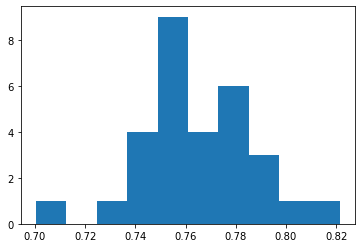

In [312]:
#histograma com 2 variaveis e KFold 'seco'

pylab.hist(resultados)

In [313]:
#adicionando novas variaveis ao modelo

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_binario  
0      0         A/5 21171   7.2500   NaN        S            0  
1      0          PC 17599  71.2833   C85        C            1  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S            1  
4      0            373450   8.0500   NaN        S            0

In [346]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']
variaveis

['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [347]:
#X e y de train,
#X as variaveis do nosso modelo,
#y oque queremos prever com elas

#fillna = pega todos os valores que estao nulos(NaN) e substitui por um passado no parametro
#-1 é diferente de todos os outros, assim nao vai dar problema no modelo

X = train[variaveis].fillna(-1)
y = train['Survived']

In [348]:
from sklearn.model_selection import RepeatedKFold

In [349]:
# rodando o modelo agora com RepeatedKFold e as novas variaveis
#acc - acuracia

resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acurácia:", acc)
    print()

Treino: 445
Valid: 446
Acurácia: 0.7869955156950673

Treino: 446
Valid: 445
Acurácia: 0.7797752808988764

Treino: 445
Valid: 446
Acurácia: 0.827354260089686

Treino: 446
Valid: 445
Acurácia: 0.8179775280898877

Treino: 445
Valid: 446
Acurácia: 0.7847533632286996

Treino: 446
Valid: 445
Acurácia: 0.7842696629213484

Treino: 445
Valid: 446
Acurácia: 0.8161434977578476

Treino: 446
Valid: 445
Acurácia: 0.7842696629213484

Treino: 445
Valid: 446
Acurácia: 0.8004484304932735

Treino: 446
Valid: 445
Acurácia: 0.8

Treino: 445
Valid: 446
Acurácia: 0.8183856502242153

Treino: 446
Valid: 445
Acurácia: 0.802247191011236

Treino: 445
Valid: 446
Acurácia: 0.8116591928251121

Treino: 446
Valid: 445
Acurácia: 0.8067415730337079

Treino: 445
Valid: 446
Acurácia: 0.820627802690583

Treino: 446
Valid: 445
Acurácia: 0.7887640449438202

Treino: 445
Valid: 446
Acurácia: 0.8385650224215246

Treino: 446
Valid: 445
Acurácia: 0.8044943820224719

Treino: 445
Valid: 446
Acurácia: 0.7982062780269058

Treino: 446

In [368]:
#media dos resultados com 6 variaveis

np.mean(resultados) 

0.8045971683377842

(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

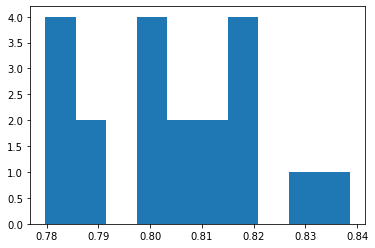

In [319]:
#histograma com 6 variaveis e RepeatedKFold

pylab.hist(resultados)

In [56]:
# retreinar o modelo

In [320]:
X.head()

Sex_binario   Age  Pclass  SibSp  Parch     Fare
0            0  22.0       3      1      0   7.2500
1            1  38.0       1      1      0  71.2833
2            1  26.0       3      0      0   7.9250
3            1  35.0       1      1      0  53.1000
4            0  35.0       3      0      0   8.0500

In [321]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [326]:
test[variaveis].head()

Sex_binario   Age  Pclass  SibSp  Parch     Fare
0            0  34.5       3      0      0   7.8292
1            1  47.0       3      1      0   7.0000
2            0  62.0       2      0      0   9.6875
3            0  27.0       3      0      0   8.6625
4            1  22.0       3      1      1  12.2875

In [327]:
#fazer treino e a previsao do modelo

modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

In [332]:
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [329]:
# criar submission

sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub

PassengerId
892     0
893     0
894     1
895     1
896     0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [179]:
#criando um arquivo csv para o segundo modelo para kaggle

sub.to_csv("segundo2_modelo.csv", header=True)

In [330]:
#verificando o arquivo csv gerado

sub.head()

PassengerId
892    0
893    0
894    1
895    1
896    0
Name: Survived, dtype: int64

In [182]:
#analise do erro

In [350]:
#revendo as previsoes que fizemos

X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['prev'] = p
X_valid_check.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_binario  prev  
0      0         A/5 21171   7.2500   NaN        S            0     0  
1      0          PC 17599  71.2833   C85        C            1     1  
2      0  STON/O2. 3101282   7.9250   NaN        S            1     0  
3      0            113803  53.1000  C123        S            1     1  
4      0            373450   8.0500   NaN        S            0     0

In [334]:
X_valid_check.shape

(445, 12)

In [351]:
#criar dataframe com os exemplos de onde a nossa previsao errou

erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['prev']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 
              'Sex_binario', 'prev', 'Survived']]
erros.head()

PassengerId  Pclass                                               Name  \
2             3       3                             Heikkinen, Miss. Laina   
21           22       2                              Beesley, Mr. Lawrence   
22           23       3                        McGowan, Miss. Anna "Annie"   
23           24       1                       Sloper, Mr. William Thompson   
25           26       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   

       Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
2   female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
21    male  34.0      0      0            248698  13.0000   D56        S   
22  female  15.0      0      0            330923   8.0292   NaN        Q   
23    male  28.0      0      0            113788  35.5000    A6        S   
25  female  38.0      1      5            347077  31.3875   NaN        S   

    Sex_binario  prev  Survived  
2             1     0         1  
21            0     0         1  
22            1     0         1  
23            0     0         1  
25            1     0         1

In [352]:
#criando grupos para verificar os erros, entre homens e mulheres

mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [353]:
#.head para mulheres

mulheres.sort_values("Survived")

PassengerId  Pclass                                               Name  \
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
501          502       3                                Canavan, Miss. Mary   
498          499       1    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
882          883       3                       Dahlberg, Miss. Gerda Ulrika   
474          475       3                        Strandberg, Miss. Ida Sofia   
419          420       3                          Van Impe, Miss. Catharina   
357          358       2                          Funk, Miss. Annie Clemmer   
254          255       3           Rosblom, Mrs. Viktor (Helena Wilhelmina)   
503          504       3                     Laitinen, Miss. Kristina Sofia   
654          655       3                       Hegarty, Miss. Hanora "Nora"   
772          773       2                                  Mack, Mrs. (Mary)   
177          178       1                         Isham, Miss. Ann Elizabeth   
852          853       3                            Boulos, Miss. Nourelain   
854          855       2      Carter, Mrs. Ernest Courtenay (Lilian Hughes)   
593          594       3                                 Bourke, Miss. Mary   
830          831       3            Yasbeck, Mrs. Antoni (Selini Alexander)   
855          856       3                         Aks, Mrs. Sam (Leah Rosen)   
866          867       2                       Duran y More, Miss. Asuncion   
677          678       3                            Turja, Miss. Anna Sofia   
2              3       3                             Heikkinen, Miss. Laina   
216          217       3                             Honkanen, Miss. Eliina   
192          193       3    Andersen-Jensen, Miss. Carla Christine Nielsine   
142          143       3  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...   
85            86       3  Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...   
44            45       3                      Devaney, Miss. Margaret Delia   
25            26       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
22            23       3                        McGowan, Miss. Anna "Annie"   
233          234       3                     Asplund, Miss. Lillian Gertrud   
479          480       3                           Hirvonen, Miss. Hildur E   

        Sex   Age  SibSp  Parch            Ticket      Fare    Cabin Embarked  \
888  female   NaN      1      2        W./C. 6607   23.4500      NaN        S   
501  female  21.0      0      0            364846    7.7500      NaN        Q   
498  female  25.0      1      2            113781  151.5500  C22 C26        S   
882  female  22.0      0      0              7552   10.5167      NaN        S   
474  female  22.0      0      0              7553    9.8375      NaN        S   
419  female  10.0      0      2            345773   24.1500      NaN        S   
357  female  38.0      0      0            237671   13.0000      NaN        S   
254  female  41.0      0      2            370129   20.2125      NaN        S   
503  female  37.0      0      0              4135    9.5875      NaN        S   
654  female  18.0      0      0            365226    6.7500      NaN        Q   
772  female  57.0      0      0       S.O./P.P. 3   10.5000      E77        S   
177  female  50.0      0      0          PC 17595   28.7125      C49        C   
852  female   9.0      1      1              2678   15.2458      NaN        C   
854  female  44.0      1      0            244252   26.0000      NaN        S   
593  female   NaN      0      2            364848    7.7500      NaN        Q   
830  female  15.0      1      0              2659   14.4542      NaN        C   
855  female  18.0      0      1            392091    9.3500      NaN        S   
866  female  27.0      1      0     SC/PARIS 2149   13.8583      NaN        C   
677  female  18.0      0      0              4138    9.8417      NaN        S   
2    female  2

In [354]:
#.head para homens

homens.sort_values("Survived")

PassengerId  Pclass                                             Name  \
238          239       2                  Pengelly, Mr. Frederick William   
442          443       3                        Petterson, Mr. Johan Emil   
422          423       3                               Zimmerman, Mr. Leo   
373          374       1                              Ringhini, Mr. Sante   
371          372       3                        Wiklund, Mr. Jakob Alfred   
698          699       1                         Thayer, Mr. John Borland   
262          263       1                                Taussig, Mr. Emil   
231          232       3                         Larsson, Mr. Bengt Edvin   
214          215       3                              Kiernan, Mr. Philip   
721          722       3                        Jensen, Mr. Svend Lauritz   
169          170       3                                    Ling, Mr. Lee   
544          545       1                       Douglas, Mr. Walter Donald   
783          784       3                           Johnston, Mr. Andrew G   
139          140       1                               Giglio, Mr. Victor   
122          123       2                             Nasser, Mr. Nicholas   
118          119       1                         Baxter, Mr. Quigg Edmond   
102          103       1                        White, Mr. Richard Frasar   
48            49       3                              Samaan, Mr. Youssef   
27            28       1                   Fortune, Mr. Charles Alexander   
34            35       1                          Meyer, Mr. Edgar Joseph   
579          580       3                              Jussila, Mr. Eiriik   
621          622       1                     Kimball, Mr. Edwin Nelson Jr   
803          804       3                  Thomas, Master. Assad Alexander   
622          623       3                                 Nakid, Mr. Sahid   
630          631       1             Barkworth, Mr. Algernon Henry Wilson   
643          644       3                                  Foo, Mr. Choong   
744          745       3                               Stranden, Mr. Juho   
751          752       3                              Moor, Master. Meier   
673          674       2                            Wilhelms, Mr. Charles   
690          691       1                          Dick, Mr. Albert Adrian   
762          763       3                            Barah, Mr. Hanna Assi   
707          708       1                Calderhead, Mr. Edward Pennington   
569          570       3                                Jonsson, Mr. Carl   
647          648       1              Simonius-Blumer, Col. Oberst Alfons   
21            22       2                            Beesley, Mr. Lawrence   
414          415       3                        Sundman, Mr. Johan Julian   
489          490       3            Coutts, Master. Eden Leslie "Neville"   
23            24       1                     Sloper, Mr. William Thompson   
36            37       3                                 Mamee, Mr. Hanna   
55            56       1                                Woolner, Mr. Hugh   
146          147       3     Andersson, Mr. August Edvard ("Wennerstrom")   
165          166       3  Goldsmith, Master. Frank John William "Frankie"   
187          188       1    Romaine, Mr. Charles Hallace ("Mr C Rolmane")   
248          249       1                    Beckwith, Mr. Richard Leonard   
553          554       3                Leeni, Mr. Fahim ("Philip Zenni")   
271          272       3                     Tornquist, Mr. William Henry   
338          339       3                            Dahl, Mr. Karl Edwart   
391          392       3                           Jansson, Mr. Carl Olof   
400          401       3                               Niskanen, Mr. Juha   
804          805       3                          Hedman, Mr. Oskar Arvid   
429          430       3               Pickard, Mr. Berk (Berk Trembisky)   
4

In [355]:
#criar modelo adicionando novas variaveis

train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [356]:
#variaveis do modelo antiga

variaveis

['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [357]:
#adicionando as novas variaveis pro novo modelo

variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula', 
            'Nome_contem_Miss', 'Nome_contem_Mrs', 'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 
            'Nome_contem_Mr']

In [358]:
#X e y de train,
#X as variaveis do nosso modelo,
#y oque queremos prever com elas

#fillna = pega todos os valores que estao nulos(NaN) e substitui por um passado no parametro
#-1 é diferente de todos os outros, assim nao vai dar problema no modelo

X = train[variaveis].fillna(-1)
y = train['Survived']

In [364]:
# rodando o modelo novo com RepeatedKFold e as novas variaveis
#acc - acuracia

resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print("Acurácia:", acc)
    print()

Treino: 445
Valid: 446
Acurácia: 0.7690582959641256

Treino: 446
Valid: 445
Acurácia: 0.7910112359550562

Treino: 445
Valid: 446
Acurácia: 0.8228699551569507

Treino: 446
Valid: 445
Acurácia: 0.8

Treino: 445
Valid: 446
Acurácia: 0.7982062780269058

Treino: 446
Valid: 445
Acurácia: 0.802247191011236

Treino: 445
Valid: 446
Acurácia: 0.8071748878923767

Treino: 446
Valid: 445
Acurácia: 0.7910112359550562

Treino: 445
Valid: 446
Acurácia: 0.8183856502242153

Treino: 446
Valid: 445
Acurácia: 0.8112359550561797

Treino: 445
Valid: 446
Acurácia: 0.8116591928251121

Treino: 446
Valid: 445
Acurácia: 0.8067415730337079

Treino: 445
Valid: 446
Acurácia: 0.8228699551569507

Treino: 446
Valid: 445
Acurácia: 0.8112359550561797

Treino: 445
Valid: 446
Acurácia: 0.7825112107623319

Treino: 446
Valid: 445
Acurácia: 0.802247191011236

Treino: 445
Valid: 446
Acurácia: 0.827354260089686

Treino: 446
Valid: 445
Acurácia: 0.8089887640449438

Treino: 445
Valid: 446
Acurácia: 0.8071748878923767

Treino: 446

((array([1., 0., 1., 2., 0., 4., 5., 3., 1., 3.]),
  array([0.7690583 , 0.77488789, 0.78071749, 0.78654709, 0.79237668,
         0.79820628, 0.80403587, 0.80986547, 0.81569507, 0.82152466,
         0.82735426]),
  <BarContainer object of 10 artists>),
 (array([1., 2., 5., 2., 8., 7., 6., 6., 2., 1.]),
  array([0.7690583 , 0.77600897, 0.78295964, 0.78991031, 0.79686099,
         0.80381166, 0.81076233, 0.817713  , 0.82466368, 0.83161435,
         0.83856502]),
  <BarContainer object of 10 artists>))

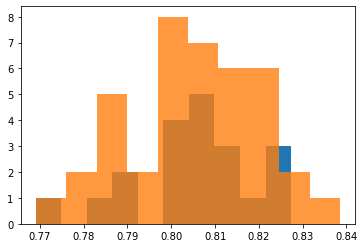

In [365]:
#comparando em histogramas com o modelo anterior
#resultados x resultados2

pylab.hist(resultados2), pylab.hist(resultados, alpha=0.8)

#azul = modelo novo
#laranja = modelo anterior

In [384]:
#media dos resultados 2 com RepeatedKFold

#0.8041457147175896

In [371]:
#verificando se há efeito na leaderboard 
#passando tudo para teste

test['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked'] = (train['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = train['Cabin'].isnull().astype(int)

test['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

test['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [373]:
#retreinando o modelo

modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

In [375]:
# criar submission

sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [376]:
#criando um arquivo csv para o modelo final para kaggle

sub.to_csv("modelo_final.csv", header=True)

In [377]:
#verificando o arquivo csv gerado

sub.head()

PassengerId
892    0
893    0
894    0
895    1
896    0
Name: Survived, dtype: int64

In [379]:
#testando modelo com regressao logistica

from sklearn.linear_model import LogisticRegression

In [380]:
# rodando o modelo novo com regressao logistica e as ultimas variaveis
#acc - acuracia

resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = LogisticRegression()
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print("Acurácia:", acc)
    print()

Treino: 445
Valid: 446
Acurácia: 0.8318385650224215

Treino: 446
Valid: 445
Acurácia: 0.8067415730337079

Treino: 445
Valid: 446
Acurácia:

C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

 0.8161434977578476

Treino: 446
Valid: 445
Acurácia: 0.802247191011236

Treino: 445
Valid: 446
Acurácia: 0.8161434977578476

Treino: 446
Valid: 445
Acurácia: 0.8157303370786517

Treino: 445
Valid: 446


C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acurácia: 0.8183856502242153

Treino: 446
Valid: 445
Acurácia: 0.8089887640449438

Treino: 445
Valid: 446
Acurácia: 0.8183856502242153

Treino: 446
Valid: 445
Acurácia: 0.8157303370786517

Treino: 445
Valid: 446


C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acurácia: 0.827354260089686

Treino: 446
Valid: 445
Acurácia: 0.8157303370786517

Treino: 445
Valid: 446
Acurácia: 0.8408071748878924

Treino: 446
Valid: 445
Acurácia: 0.8044943820224719

Treino: 445
Valid: 446


C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acurácia: 0.8071748878923767

Treino: 446
Valid: 445
Acurácia: 0.8044943820224719

Treino: 445
Valid: 446
Acurácia: 0.8430493273542601

Treino: 446
Valid: 445
Acurácia: 0.8179775280898877

Treino: 445
Valid: 446
Acurácia: 0.8318385650224215

Treino: 446
Valid: 445
Acurácia: 0.8269662921348314



C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

((array([3., 3., 0., 8., 0., 0., 2., 2., 0., 2.]),
  array([0.80224719, 0.8063274 , 0.81040762, 0.81448783, 0.81856805,
         0.82264826, 0.82672847, 0.83080869, 0.8348889 , 0.83896911,
         0.84304933]),
  <BarContainer object of 10 artists>),
 (array([1., 2., 5., 2., 8., 7., 6., 6., 2., 1.]),
  array([0.7690583 , 0.77600897, 0.78295964, 0.78991031, 0.79686099,
         0.80381166, 0.81076233, 0.817713  , 0.82466368, 0.83161435,
         0.83856502]),
  <BarContainer object of 10 artists>))

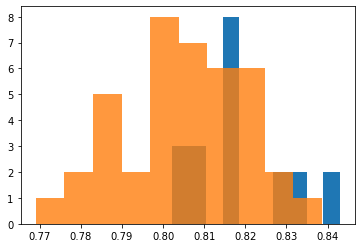

In [381]:
#comparando em histogramas com o modelo anterior agr em regressao logistica
#resultados x resultados2

pylab.hist(resultados2), pylab.hist(resultados, alpha=0.8)

#azul = modelo novo
#laranja = modelo anterior

In [383]:
#media dos resultados 2 com regressao logistica

np.mean(resultados2)

0.8185111099914344

In [385]:
#verificando se há efeito na leaderboard agr com regressao logistica
#passando tudo para teste

test['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked'] = (train['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = train['Cabin'].isnull().astype(int)

test['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

test['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [386]:
#retreinando o modelo

modelo = LogisticRegression()
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [387]:
# criar submission

sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [388]:
#criando um arquivo csv para o modelo final regressao logistica para kaggle

sub.to_csv("modelo_finalLogisticRegression.csv", header=True)